# Подключение библиотек

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Подключение и очистка данных

In [192]:
titanic_data_path = ".\\titanic_data\\train.csv"
titanic_data = pd.read_csv(titanic_data_path)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


Проверим количество незаполненных данных по разным признакам:
 * Cabin
 * Age
 * Embarked
 * Fare

In [193]:
titanic_data.PassengerId[titanic_data.Cabin.notnull()].count() / 100000


0.32134

Как мы можем увидеть, ячейки с данными о каюте составляют только 32% от общего числа, поэтому это поле при анализе можно опустить

In [194]:
titanic_data = titanic_data.drop("Cabin", axis = 1)

Проанализруем количество незаполненных данных о возрасте

In [195]:
100000 - titanic_data.PassengerId[titanic_data.Age.notnull()].count() 

3292

Как мы можем видеть, мы имеем 3300 ячеек, которые имеют пустые значения.

Заменим их на медианное значение

In [196]:
titanic_data.Age = titanic_data.Age.fillna(titanic_data.Age.median())
100000 - titanic_data.PassengerId[titanic_data.Age.notnull()].count() 

0

Как мы можем видеть, все поля возраста успешно заполнились

Проверим количество пассажиров, для которых не указан порт посадки(Embarked)

In [197]:
titanic_data[titanic_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
122,122,0,2,"Broadway, Donald",male,65.0,0,0,43939,23.80,NaN
266,266,0,3,"Rodriguez, Richard",male,26.0,0,0,11963,7.02,NaN
489,489,0,1,"Dahms, Ashley",female,34.0,0,0,321399,28.63,NaN
1017,1017,1,1,"Palmer, Wanda",female,53.0,0,0,PC 28731,28.10,NaN
2005,2005,1,1,"Savage, Maria",female,46.0,0,0,11914,30.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...
98228,98228,0,3,"Kunz, Marc",male,19.0,0,0,S.C./PARIS 478751,27.97,NaN
98577,98577,1,3,"Moncivais, Kay",female,44.0,0,1,CA 46094,25.46,NaN
98873,98873,0,1,"Byers, Karen",female,47.0,2,1,29939,28.88,NaN
99237,99237,1,3,"Walker, Carrie",female,71.0,0,0,526691,27.13,NaN


Таких пассажирров всего 250, можем заполнить их данные о порте посадки самым часто встречающимся портом

In [198]:
titanic_data.groupby('Embarked').count()["PassengerId"].idxmax()

'S'

In [199]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data.groupby('Embarked').count()["PassengerId"].idxmax())
titanic_data.groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,22187,22187,22187,22187,22187,22187,22187,22187,21949,22154
Q,5424,5424,5424,5424,5424,5424,5424,5424,5369,5416
S,72389,72389,72389,72389,72389,72389,72389,72389,68059,72296


Все незаполненные поля успешно заполнены.

Проверим  поле Fare на пустые значения и если таковые имеются заменим цену медианой по цене из все выборки:


In [200]:
titanic_data.Fare = titanic_data.Fare.fillna(titanic_data.Fare.median())

Опустим поля, которые на мой взгляд не имеют статестической ценности

In [201]:
titanic_data = titanic_data.drop(['Name','Ticket'],axis=1)

# Общая статистика

In [202]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,male,39.00,2,0,27.14,S
1,1,0,3,male,39.00,0,0,13.35,S
2,2,0,3,male,0.33,1,2,71.29,S
3,3,0,3,male,19.00,0,0,13.04,S
4,4,1,3,male,25.00,0,0,7.76,S
...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,female,62.00,0,0,14.86,C
99996,99996,0,2,male,66.00,0,0,11.15,S
99997,99997,0,3,male,37.00,0,0,9.95,S
99998,99998,0,3,male,51.00,0,1,30.92,S


In [203]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,0.427740,2.106910,38.376690,0.397690,0.454560,43.903241
std,28867.657797,0.494753,0.837727,18.009956,0.862566,0.950076,69.545827
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.460000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.470000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


## Зависимость выживаемости от пола

Можно предположить, что шанс выжить у средней женщины был сильно выше, чем шанс выжить у среднего мужчины

<AxesSubplot:title={'center':'Зависимость выживаемости от пола'}, xlabel='Sex', ylabel='Survived'>

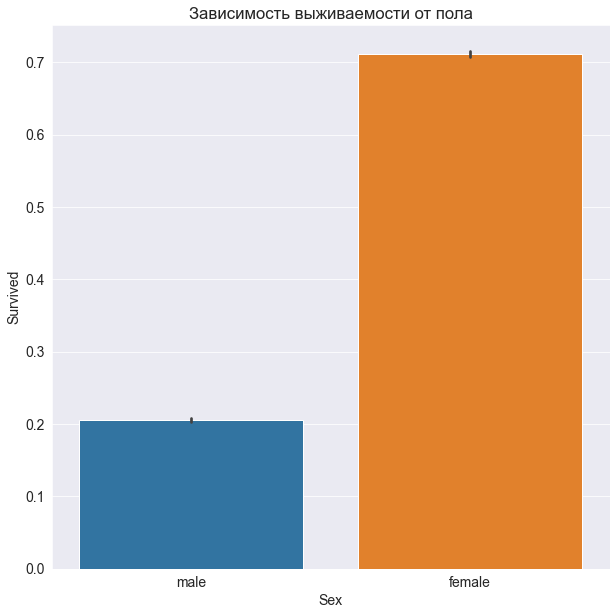

In [204]:
plt.figure(figsize=(10,10))
plt.title("Зависимость выживаемости от пола")
sns.barplot(data=titanic_data, x="Sex", y="Survived")

### Наше предположение подтвердилось

В живых осталось:
   * 20% мужчин
   * 70% женщин
   
Можно показать этот же результат еще более наглядным графиком

<Figure size 1080x1080 with 0 Axes>

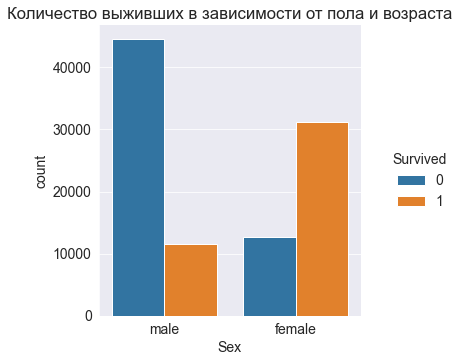

<Figure size 1080x1080 with 0 Axes>

In [205]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = titanic_data)
plt.title("Количество выживших в зависимости от пола и возраста")
plt.figure(figsize=(15,15))

## Зависимость социального статуса и выживаемости

Можно проверить, зависит ли шанс на спасение от класса и стоимости билета

<AxesSubplot:title={'center':'Соотнешение погибших и выживших по классам билета'}, xlabel='Class'>

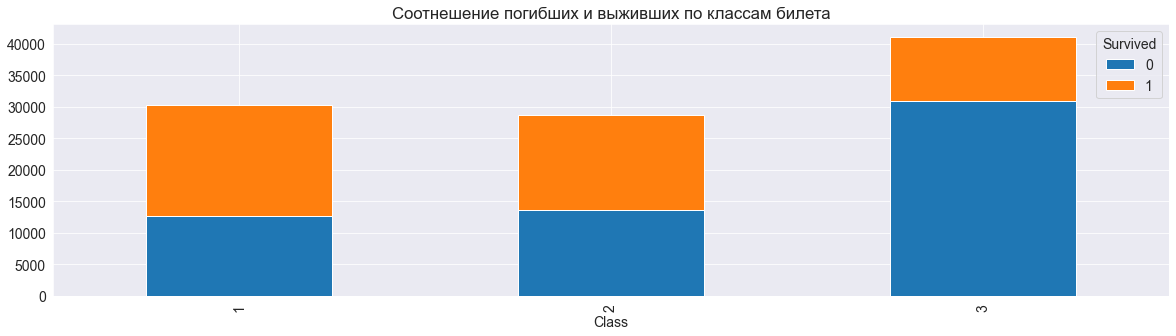

In [206]:

titanic_data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True, xlabel='Class', \
                                                                            title='Соотнешение погибших и выживших по классам билета')

В этом графике видно, что наше предположение подтвердилось, и шанс на спасение действительно зависят от класса билета

Text(0.5, 1.0, 'Шанс на спасение для каждого класса')

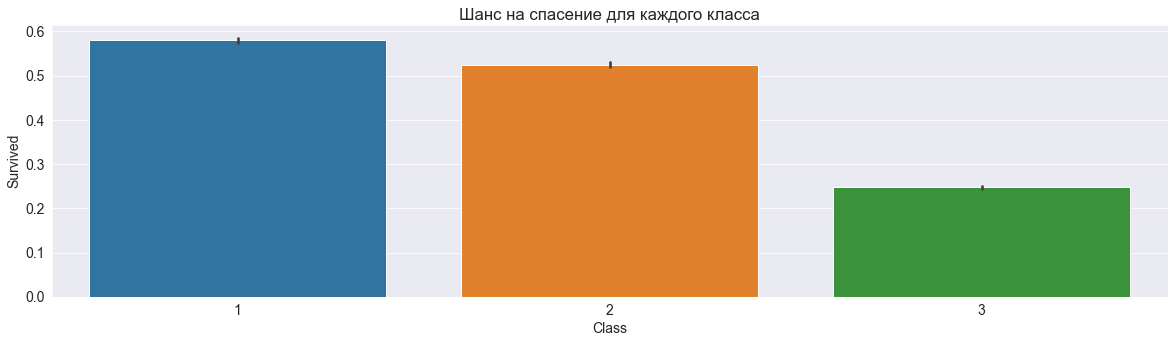

In [207]:
sns.barplot(data=titanic_data, x='Pclass', y = 'Survived')
plt.xlabel("Class")
plt.title("Шанс на спасение для каждого класса")

Этот график еще более наглядно показывает неравенство распределения выживших, притом шанс выжить резко падает в третьем классе.

Также это можно показать с помощью heatmap:

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

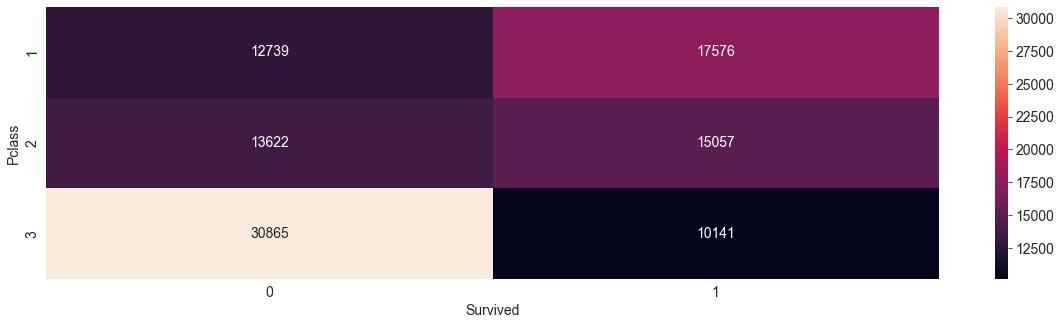

In [208]:
group = titanic_data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Проанализруем зависимость возраста пассажиров и выживаемости:

<AxesSubplot:title={'center':'Зависимость выживаемости от возраста'}, xlabel='Sex', ylabel='Age'>

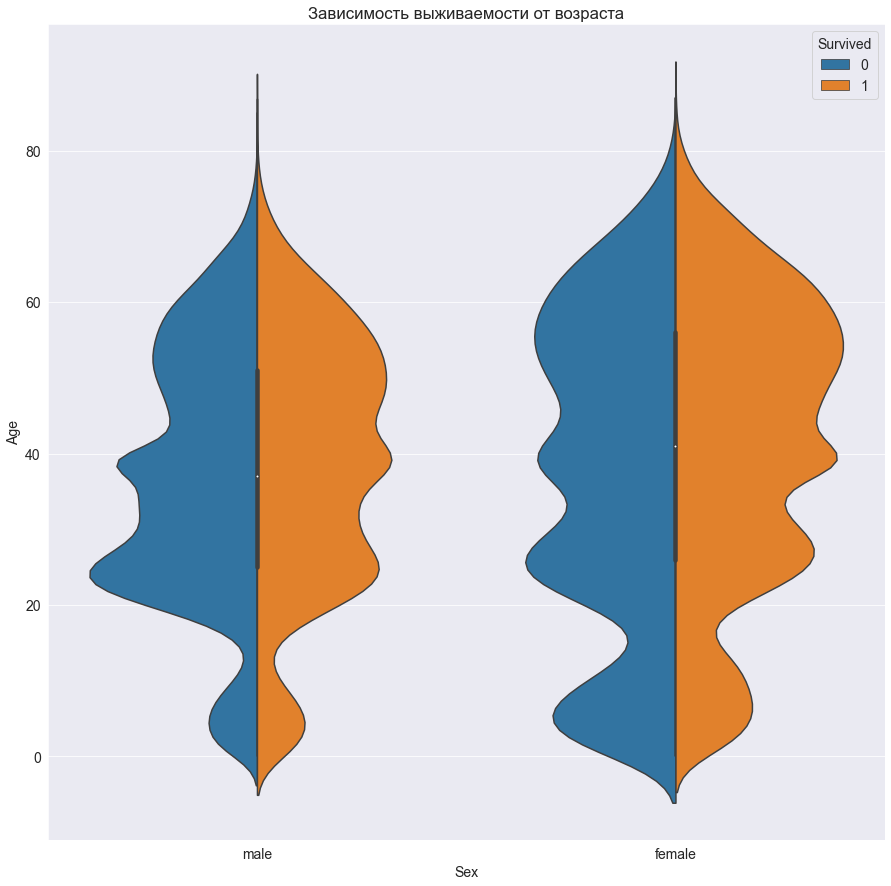

In [209]:
plt.figure(figsize=(15,15))
plt.title("Зависимость выживаемости от возраста")
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = titanic_data, split = True)

По этому графику видно, что шанс на выживание:
  * Быстро уменьшается для мужчин с увеличением возраста
  * Высок для женщин от 20 до 60

# Зависимость шанса на выживание от количества родственников

Давайте заведем новые колонки для размера семьи и того, имеет ли он семью в целом, и проанализируем зависимость выживаемости от этих колонок

C:\Users\vipca\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vipca\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


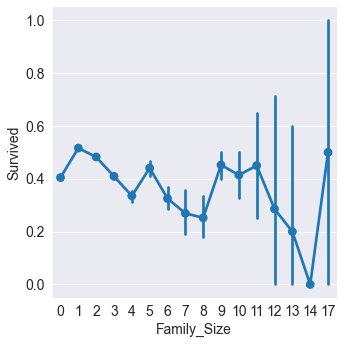

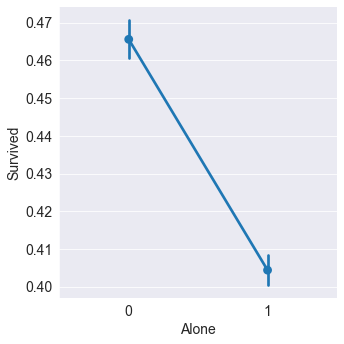

In [211]:
titanic_data['Family_Size'] = 0
titanic_data['Family_Size'] = titanic_data['Parch']+titanic_data['SibSp']

titanic_data['Alone'] = 0
titanic_data.loc[titanic_data.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Siz

sns.factorplot(x ='Family_Size', y ='Survived', data = titanic_data)
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic_data)


По этим данным видно, что:
* Шанс выжить у одинокого человека меньше, чем у человека, имеющего хотя бы одного родственника
* Шанс выжить в среднем уменьшается при увеличении количества родственников, если не считать семьи очень большого размера(их мало, поэтому трудно делать статистически достоверные выводы на их основе)

#### Теперь найдем непосредственную зависимость выживаемости от цены билета

<Figure size 1800x1080 with 0 Axes>

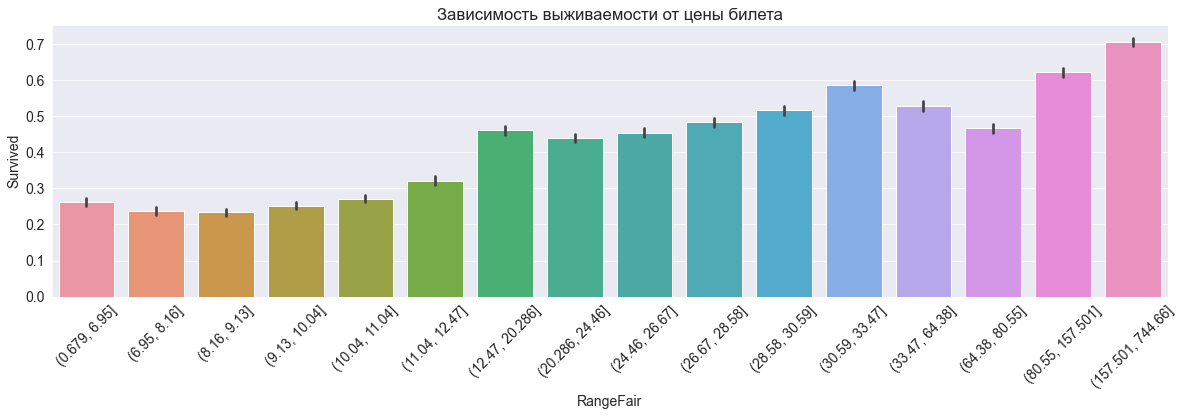

<Figure size 1800x1080 with 0 Axes>

In [212]:
titanic_data["RangeFair"] = pd.qcut(titanic_data['Fare'], 16)

sns.barplot(x="RangeFair", y="Survived", data = titanic_data)
plt.xticks(rotation=45)
plt.title("Зависимость выживаемости от цены билета")
plt.figure(figsize=(25,15))

По этому графику видно, что с увеличением цены билета увеличивается и шанс пассажира на выживание

# Зависимость выживаемости пассажира от порта отправления

Проверим, есть ли какая-то заметная корреляция порта отправления и выживания

<Figure size 2880x720 with 0 Axes>

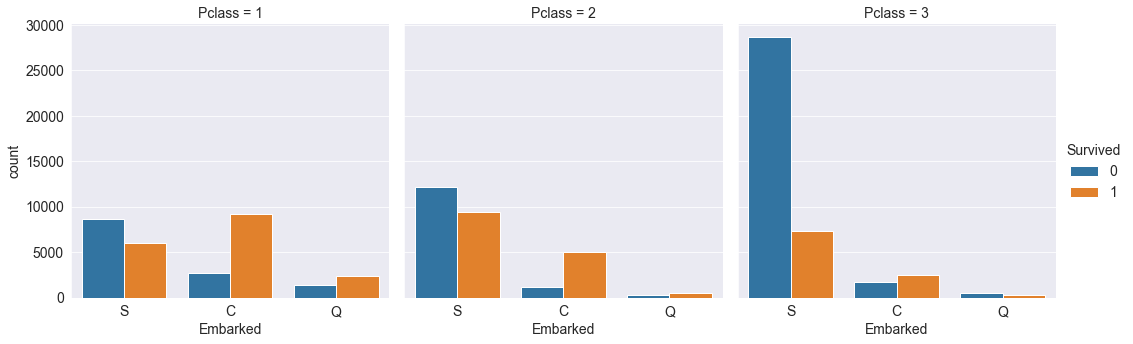

In [213]:
plt.figure(figsize=(40, 10))
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = titanic_data)

* Бошльшинство людей с билетами 3 класса отправлялись из Q
